# Сервис аренды самокатов

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Других пока не пропомню. Поэтому переходим к загрузке данных.

#### Шаг 1. Загрузка данных

В наличии 3 дата-файла: Пользователи, Поездки, Подписки. Попытаюсь назвать датафоеймы сообразно этому.

In [ ]:
user = pd.read_csv('/datasets/users_go.csv') # считываем файл с пользователями
ride = pd.read_csv('/datasets/rides_go.csv') # считываем файл с поездками
subscr = pd.read_csv('/datasets/subscriptions_go.csv') # считываем файл с подписками

Взглянем на несколько строк наших наборов. Вдруг понадобится, например, добавить разделитель. Да и вообще, познакомиться с данными. Буду делать это по очереди.

In [ ]:
user.info()
user.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Всё в порядке. Таблица. АйДи, имя, возраст и т.д. Нулевых ячеек нет. К типу данных претензий нет.

In [ ]:
ride.info()
ride.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


В столбце "Дата" тип object. На следующем шаге поправим.

In [ ]:
subscr.info()
subscr.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Неожиданно маленький файл. Тоже вопросов к нему не возникло.

Движемся дальше. Переходим к предобработке.

#### Шаг 2. Предобработка данных

##### Перевод столбца date (файл "Поездки") к типу даты Pandas

Применю try-except для подстраховки

In [ ]:
try:
    ride['date'] = pd.to_datetime(ride['date'],format='%Y-%m-%dT%H:%M:%S')
    print('перевели')
except:
    print('не получилось')

перевели


Посмотрю, что получилось.

In [ ]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Теперь дата в формате даты.

##### Создание столбца с номером месяца на основе столбца "Date"

In [ ]:
ride['month'] = ride['date'].dt.month

Проверяем, что получилось.

In [ ]:
ride.head(15)
ride['date'].describe()

/tmp/ipykernel_259/4133970559.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ride['date'].describe()


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

Получилось. Движемся дальше.

##### Проверяем наличие пропущенных значений и дубликатов в датафреймах. Обрабатываем их, если такие значения присутствуют.

Начинаю с "Пользователей". По пропускам уже смотрел в первом разделе проекта, но повторить несложно.

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Пропусков нет. Проверяем на дубликаты. Исходя из имеющихся колонок... Повториться может всё. Кроме номера пользователя. Проверяем.

In [ ]:
user['user_id'].duplicated().sum()

31

31 дубликат из 1565. Около 2%. Можно избавиться. Пишу код с расчётом, что чищу по дубликатам с повторяющимся ID и оставляю первую строку из одинаковых.

In [ ]:
user = user.drop_duplicates(subset=['user_id'], keep='first')

Проверяю, что 31 строка удалилась и дубликатов больше нет.

In [ ]:
user.info()
user.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


0

Очищение "Пользователей" от дубликатов провели. Перехожу к "Поездкам".

In [ ]:
ride.duplicated().sum()

0

Неожиданно всё хорошо. Тогда переходим к шагу 3.

В результате обработки сделано следующее:
1. В файле "поездки" скорректирован формат даты - переведён в формат даты Pandas;
2. Рассмотрены все файлы на предмет дубликатов.
3. Обнаружены и убраны дубликаты из файла "пользователи".

#### Шаг 3. Исследовательский анализ данных

##### Визуализация и описание частоты встречаемости городов

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

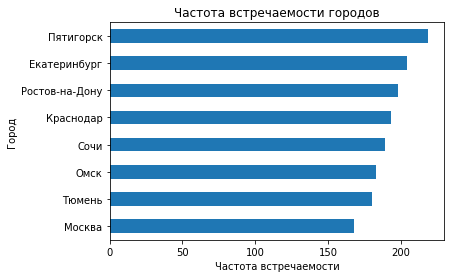

In [ ]:
user.groupby(by='city')['city'].count().sort_values(ascending = True).plot(kind='barh', ylabel = 'count');
plt.title("Частота встречаемости городов")
plt.ylabel("Город")
plt.xlabel("Частота встречаемости")

user ['city'].describe()

Небольшое преимущество у Пятигорска, а в целом более-менее всё равномерно.

##### Визуализация и описание соотношения пользователей с подпиской и без

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

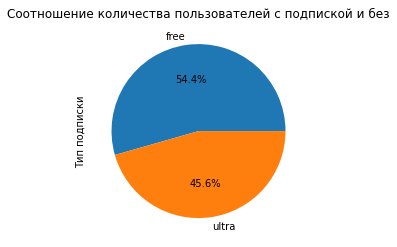

In [ ]:
user.groupby(by='subscription_type')['subscription_type'].count().plot(kind='pie', autopct = '%1.1f%%',
                                                                       ylabel = 'Тип подписки');
plt.title('Соотношение количества пользователей с подпиской и без')
user ['subscription_type'].describe()

Без подписки большая часть пользователей, если смоотреть файл в целом. Возможно, по городам будет разница. Проверим несколько.

Text(0.5, 1.0, 'Соотношение количества пользователей в Пятигорске')

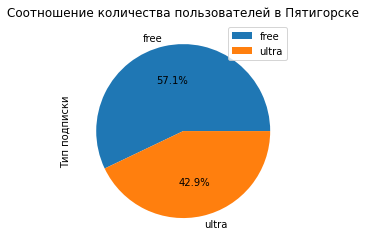

In [ ]:
(
    user[user['city']=='Пятигорск']
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True)
)
plt.title('Соотношение количества пользователей в Пятигорске')

Text(0.5, 1.0, 'Соотношение количества пользователей в Москве')

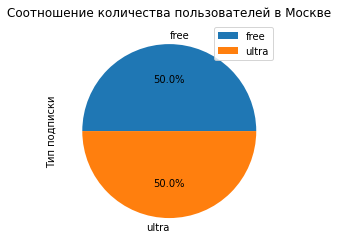

In [ ]:
(
    user[user['city']=='Москва']
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True)
)
plt.title('Соотношение количества пользователей в Москве')

Text(0.5, 1.0, 'Соотношение количества пользователей в Сочи')

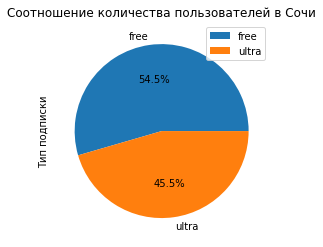

In [ ]:
(
    user[user['city']=='Сочи']
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True)
)
plt.title('Соотношение количества пользователей в Сочи')

Text(0.5, 1.0, 'Соотношение количества пользователей в Тюмени')

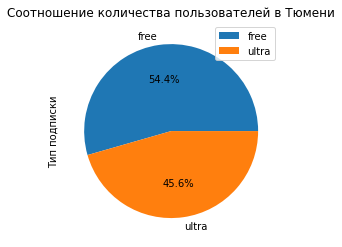

In [ ]:
(
    user[user['city']=='Тюмень']
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True)
)
plt.title('Соотношение количества пользователей в Тюмени')

Text(0.5, 1.0, 'Соотношение количества пользователей в Краснодаре')

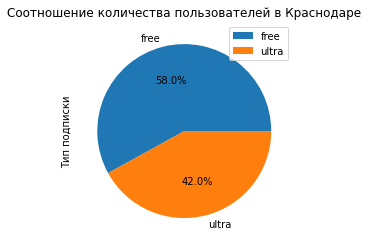

In [ ]:
(
    user[user['city']=='Краснодар']
    .pivot_table(
        index='subscription_type',
        values='user_id',
        aggfunc='count')
    .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True)
)
plt.title('Соотношение количества пользователей в Краснодаре')

За исключением Москвы, в основном пользователи пользуются сервисом без подписки.

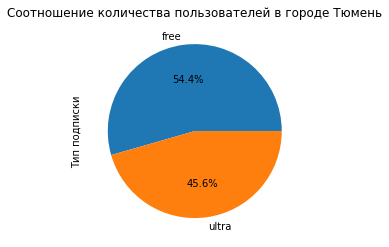

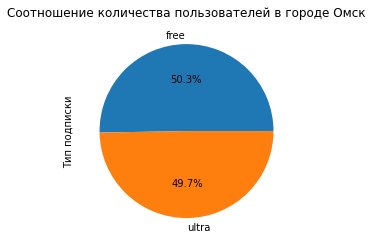

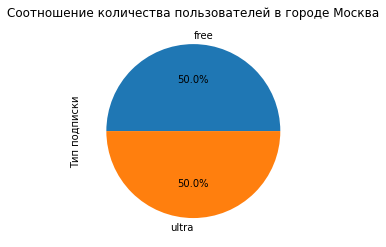

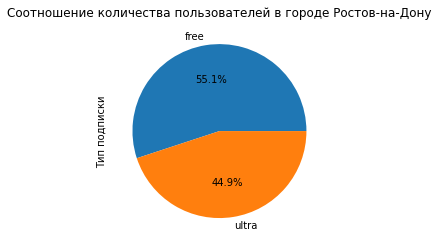

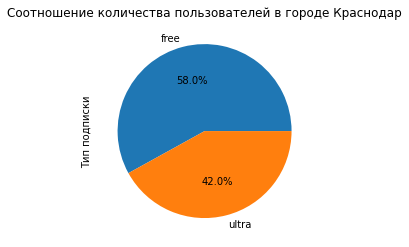

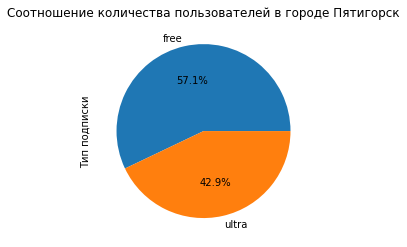

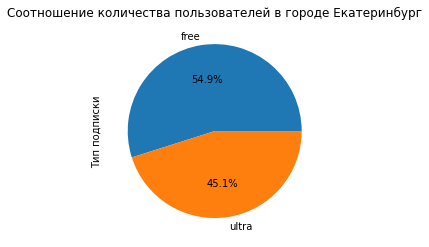

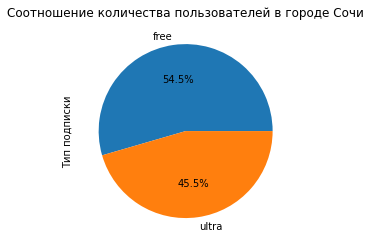

In [ ]:
# код ревьюера
for city in user['city'].unique():


    (
        user[user['city']==city]
        .pivot_table(
            index='subscription_type',
            values='user_id',
            aggfunc='count')
        .plot(kind='pie', autopct = '%1.1f%%', ylabel = 'Тип подписки', subplots = True, legend=False)
    )

    plt.title(f'Соотношение количества пользователей в городе {city}')
    plt.show()

##### Визуализируем данные о возрасте пользователей

Text(0.5, 0, 'Возраст')

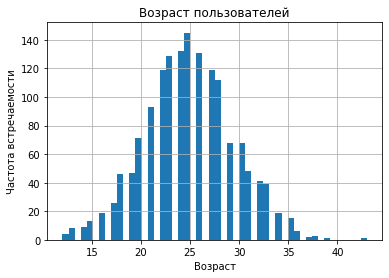

In [ ]:
user['age'].hist(bins=50)
plt.title("Возраст пользователей")
plt.ylabel("Частота встречаемости")
plt.xlabel("Возраст")

Возраст распределён нормально. Среднее - 25 лет. Наибольшее число в диапазоне 22-27 лет.

Движемся дальше.

##### Визуализируем данные о расстоянии, проделанном пользователем за одну поездку

Решил посмотреть данные на диаграмме рассеяния. Для каждого пользователя несколько значений, поэтому взглянуть интересно.

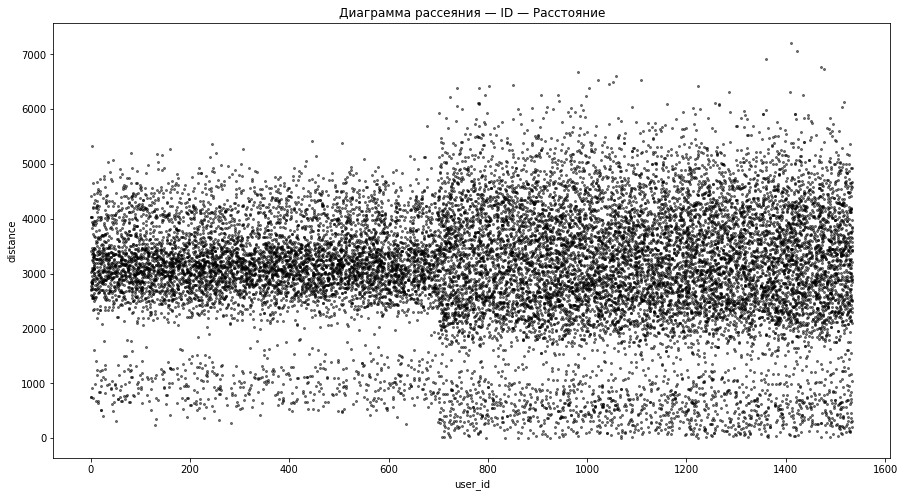

In [ ]:
ride.plot(kind='scatter',
        y='distance' , x='user_id', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — ID — Расстояние');

Интересно. "Вертикальным" разделом служит значение User_ID=700. Это первый пользователь без подписки. Разброс в дистанции у пользователей без подписки шире, в то время, как пользователи по подписке чаще всего проезжают дистанцию от 2500 до 3500.
По "горизонтали" есть разреженная область примерно 1700, в которой значения редкие. Интересно...

Построю теперь обычные гистограммы.

Text(0.5, 0, 'Расстояние')

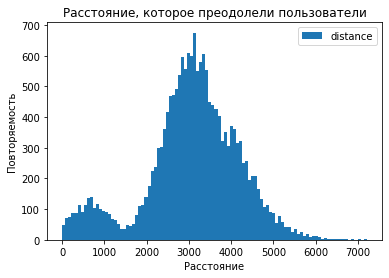

In [ ]:

ride.plot(kind='hist', y= 'distance',bins=100)
plt.title("Расстояние, которое преодолели пользователи")
plt.ylabel("Повторяемость")
plt.xlabel("Расстояние")

Бимодальное распределение. Основной пик - наиболее частые значения в выборке по расстоянию - примерно 2800-3300, с пиком где-то в районе 3000-3100. Малый "горб" с пиком 800. То есть существует относительно частый "пласт" коротких поездок.

ride.plot(kind='hist', y='duration',bins=100)
plt.title("Длительность поездок пользователей")
plt.ylabel("Повторяемость")
plt.xlabel("Время поездки")

Тоже "нормально". Наиболее частые значения длительности - от 14 до 22. Пик - 17-18. Есть пичок на 1 минуте - чуть меньше 100 поездок.

#### Шаг 4. Объединение данных

##### Объединяю данные о пользователях, поездках и подписках в один датасет.

Объединяю по АйДи.

In [ ]:
united = user.merge(ride, on='user_id')


Проверяю, что получилось.

In [ ]:
united.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [ ]:
full = united.merge(subscr, on = 'subscription_type')
full.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


##### Создаю два датафрейма: позьзователи с подпиской и без.

Сначала без подписки. Сразу проверяем, что получилось.

In [ ]:
free_users = full.query('subscription_type == "free"')
free_users.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


То, что задавал. Теперь выделяем датафрейм с пользователями с подпиской.

In [ ]:
ultra_users = full.query('subscription_type == "ultra"')
ultra_users.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


На всякий случай выведу информацию по обоим датафреймам и по "материнскому" тоже, чтобы убедиться в полноте данных.

In [ ]:
free_users.info()
ultra_users.info()
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>

6500 + 11568 = 18068. Всё верно, ничего не упущено. Движемся дальше.

##### Визуализируем информацию о расстоянии и времени поездок для обеих категорий пользователей.

###### Пользователи без подписки.

Сначала дистанция поездки.

Text(0.5, 0, 'Расстояние')

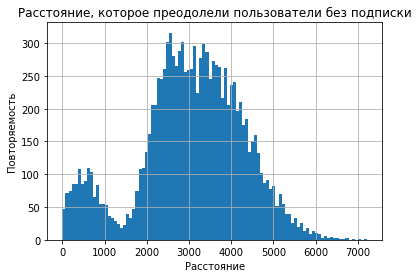

In [ ]:
free_users['distance'].hist(bins=100)
plt.title("Расстояние, которое преодолели пользователи без подписки")
plt.ylabel("Повторяемость")
plt.xlabel("Расстояние")



Бимодальное распределение. Малый пик наиболее частых значений в районе 500 м (более 100 поездок), большое - на 2500 примерно (более 300 поездок).

Теперь длительность поездки.

Text(0.5, 0, 'Длительность')

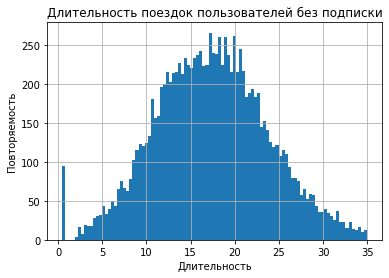

In [ ]:
free_users['duration'].hist(bins=100)
plt.title("Длительность поездок пользователей без подписки")
plt.ylabel("Повторяемость")
plt.xlabel("Длительность")

Есть пичок на одной минуте (чуть менее 100 поездок). Основной пик в районе 17-18 минут.

###### Пользователи с подпиской

Сначала дистанция

Text(0.5, 0, 'Расстояние')

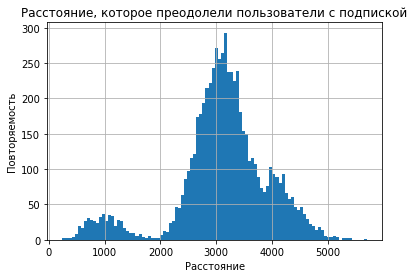

In [ ]:
ultra_users['distance'].hist(bins=100)
plt.title("Расстояние, которое преодолели пользователи с подпиской")
plt.ylabel("Повторяемость")
plt.xlabel("Расстояние")

Можно сказать - 3 пика. В районе 1000. Четкий основной пик примерно на 3100. И второй малый пик на 4000.

Теперь длительность поездки.

Text(0.5, 0, 'Длительность')

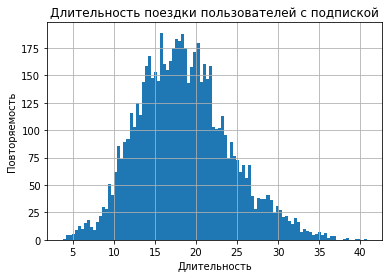

In [ ]:
ultra_users['duration'].hist(bins=100)
plt.title("Длительность поездки пользователей с подпиской")
plt.ylabel("Повторяемость")
plt.xlabel("Длительность")

Теперь отображу графики для пользователей с подпиской и без совместно. Для расстояния и для длительности.

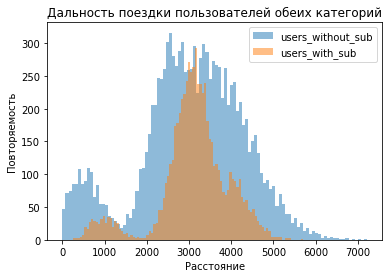

In [ ]:
users_without_sub = free_users['distance']
users_with_sub = ultra_users['distance']


plt.hist(users_without_sub, bins=100, alpha = 0.5, label='users_without_sub')
plt.hist(users_with_sub, bins=100, alpha = 0.5, label='users_with_sub')
plt.legend(loc='upper right')

plt.title("Дальность поездки пользователей обеих категорий")
plt.ylabel("Повторяемость")
plt.xlabel("Расстояние")
plt.show()

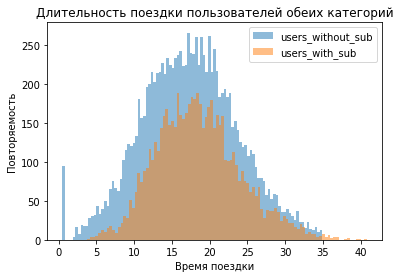

In [ ]:
users_without_sub = free_users['duration']
users_with_sub = ultra_users['duration']


plt.hist(users_without_sub, bins=100, alpha = 0.5, label='users_without_sub')
plt.hist(users_with_sub, bins=100, alpha = 0.5, label='users_with_sub')
plt.legend(loc='upper right')
plt.title("Длительность поездки пользователей обеих категорий")
plt.ylabel("Повторяемость")
plt.xlabel("Время поездки")
plt.show()

Пик в районе 16-17 минут. Можно считать, что один. Остальные так ярко не выражены.

В целом данные по пользователям с подпиской показывают большую "группировку" как по расстоянию, так и по времени поездки. Данные по пользователям без подписки распределены более широко, поэтому и пики более гладкие. Значения по расстоянию поездок для пользователей по подписке имеют более широкий диапазон как в меньшую, так и в большую сторону. Дополнительные пики для коротких поездок говорят, возможно о специфической потребности в короткой поездке. Возможно, от дома до остановки или станции.

#### Шаг 5. Подсчёт выручки

##### Создаём датафрейм с агрегированными данными по поездкам

In [ ]:
full['duration'] = np.ceil(full['duration'])
full.head()


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
full_sum=full.pivot_table(index=['user_id','month'],
        values = ['distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price','subscription_fee' ],
        aggfunc = {'distance':'sum', 'duration':'sum', 'name':'count',
                'subscription_type':'first', 'minute_price':'first', 'start_ride_price':'first', 'subscription_fee':'first' })

In [ ]:
full_sum.tail(15)

distance  duration  minute_price  name  start_ride_price  \
user_id month                                                                 
1533    2        310.488247      11.0             8     1                50   
        3      12822.696276      93.0             8     4                50   
        4       2514.498956      18.0             8     1                50   
        6       1034.998188       7.0             8     1                50   
        7       8772.518529      48.0             8     3                50   
        8       4581.943632      22.0             8     1                50   
        11      3414.448028      26.0             8     1                50   
1534    1       4678.415899      16.0             8     1                50   
        2       2103.914120      14.0             8     1                50   
        4       3434.290912      15.0             8     1                50   
        6       3409.468534      26.0             8     2                50   
        8       7622.453034      48.0             8     2                50   
        9       4928.173852      23.0             8     1                50   
        11     13350.015305      78.0             8     4                50   
        12      2371.711192      16.0             8     1                50   

               subscription_fee subscription_type  
user_id month                                      
1533    2                     0              free  
        3                     0              free  
        4                     0              free  
        6                     0              free  
        7                     0              free  
        8                     0              free  
        11                    0              free  
1534    1                     0              free  
        2                     0              free  
        4                     0              free  
        6                     0              free  
        8                     0              free  
        9                     0              free  
        11                    0              free  
        12                    0              free

Суммировал по именам. Поэтому переименую колонку в "количество поездок".

In [ ]:
full_sum = full_sum.rename(columns={'name': 'rides_amount'})
full_sum.head()

distance  duration  minute_price  rides_amount  \
user_id month                                                      
1       1      7027.511294      42.0             6             2   
        4       754.159807       7.0             6             1   
        8      6723.470560      46.0             6             2   
        10     5809.911100      32.0             6             2   
        11     7003.499363      56.0             6             3   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra

##### Добавить дополнительный столбец с помесячной выручкой для каждого пользователя

Добавляю столбец с выручкой и выведу данные на экран для проверки.

In [ ]:

full_sum['revenue'] = full_sum['subscription_fee'] + full_sum['start_ride_price']*full_sum['rides_amount'] + full_sum['minute_price']*full_sum['duration']


In [ ]:
#def revenue(row):
 #   rides_amount = row['rides_amount']
  #  subscription_type = row['subscription_type']
   # duration = row['duration']
    #if subscription_type == 'free':
     #   return 50*rides_amount+8*duration
    #elif subscription_type == 'ultra':
     #   return 199+6*duration
full_sum.head(15)

distance  duration  minute_price  rides_amount  \
user_id month                                                       
1       1       7027.511294      42.0             6             2   
        4        754.159807       7.0             6             1   
        8       6723.470560      46.0             6             2   
        10      5809.911100      32.0             6             2   
        11      7003.499363      56.0             6             3   
        12      6751.629942      28.0             6             2   
2       3      10187.723006      63.0             6             3   
        4       6164.381824      40.0             6             2   
        6       3255.338202      14.0             6             1   
        7       6780.722964      48.0             6             2   
        8        923.007439       7.0             6             1   
        10      2824.636598      19.0             6             1   
        12      3828.248580      12.0             6             1   
3       1       3061.777147      13.0             6             1   
        2       5421.152016      39.0             6             2   

               start_ride_price  subscription_fee subscription_type  revenue  
user_id month                                                                 
1       1                     0               199             ultra    451.0  
        4                     0               199             ultra    241.0  
        8                     0               199             ultra    475.0  
        10                    0               199             ultra    391.0  
        11                    0               199             ultra    535.0  
        12                    0               199             ultra    367.0  
2       3                     0               199             ultra    577.0  
        4                     0               199             ultra    439.0  
        6                     0               199             ultra    283.0  
        7                     0               199             ultra    487.0  
        8                     0               199             ultra    241.0  
        10                    0               199             ultra    313.0  
        12                    0               199             ultra    271.0  
3       1                     0               199             ultra    277.0  
        2                     0               199             ultra    433.0

Переходим к проверке гипотез.

#### Шаг 6. Проверка гипотез

##### Проверим, тратят ли пользователи с подпиской больше времени на поездки

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
Сформулирую гипотезы следующим образом:
1. Нулевая - H0 - Пользователи с подпиской и пользователи без подписки тратят одинаковое время на поездки.
2. Альтернативная - Н1 - Пользователи с подпиской тратят на поездки больше времени.

In [ ]:

duration_free = free_users['duration']
duration_ultra = ultra_users['duration']
alpha = 0.05
results = st.ttest_ind(duration_ultra, duration_free, alternative = 'greater')

print('p-значение:', results.pvalue )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.


Проверим.

In [ ]:
print('средняя длительность поездки для пользователей без подписки:', duration_free.mean())
print('средняя длительность для пользователей с подпиской:', duration_ultra.mean())

средняя длительность поездки для пользователей без подписки: 17.39090929866399
средняя длительность для пользователей с подпиской: 18.54198516280583


Действительно, пользователи с подпиской тратят больше времени на поездку.

Ну что же, получается, что пользователи с подпиской ездят дольше в целом. Проверю среднее время поездки через простой условный оператор.

##### Оптимальное расстояние с точки зрения износа самоката

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Формулируем гипотезы:
1. Нулевая - Н0 - Расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.
2. Альтернативная - Н1 - Расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.

In [ ]:
optimal_value = 3130

distance_ultra = ultra_users['distance']
alpha = 0.05

results = st.ttest_1samp(distance_ultra, optimal_value, alternative = 'less')

print('p-значение:', results.pvalue )

if results.pvalue < alpha:
    print('Принимаем нулевую гипотезу')
else:
    print('Принимаем альтернативную гипотезу, расстояние меньше 3130')

p-значение: 0.08046311521502146
Принимаем альтернативную гипотезу, расстояние меньше 3130


Проверим

In [ ]:
print('среднее расстояние поездки для пользователей с подпиской:', distance_ultra.mean())


среднее расстояние поездки для пользователей с подпиской: 3115.4453880370247


Альтернативная гипотеза верна. Расстояние, которое преодолевают пользователи с подпиской, меньше 3130 м.

##### Проверка месячной выручки

Проверяем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Формулирую гипотезы:
1. Нулевая - Н0 - Помесячная выручка пользователей с подпиской и без - одинаковая.
2. Альтернативная - Н1 - Помесячная выручка пользователей с подпиской больше.

In [ ]:
full_sum_free = full_sum[full_sum['subscription_type']=='free']['revenue']
full_sum_ultra = full_sum[full_sum['subscription_type']=='ultra']['revenue']

Опять же, нулевая гипотеза - равенство величин.

In [ ]:


alpha = 0.05
results = st.ttest_ind(full_sum_ultra, full_sum_free, alternative = 'greater')

print('p-значение:', results.pvalue )


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: выручка от пользователей с подпиской больше')
else:
    print('Не получилось отвергнуть нулевую гипотезу: выручка от пользователей с подпиской не больше')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: выручка от пользователей с подпиской больше


Проверим среднее значение выручки.

In [ ]:
print('средняя выручка для пользователей без подписки:', full_sum_free.mean())
print('средняя выручка для пользователей с подпиской:', full_sum_ultra.mean())

средняя выручка для пользователей без подписки: 328.6413651073845
средняя выручка для пользователей с подпиской: 362.7921906022502


Итак, получаем, что пользователи с подпиской в среднем проезжают большее расстояние, чем пользователи без подписки. При этом расстояние оптимально с точки зрения износа самоката. И выручка от пользователей с подпиской больше.

##### Теоретическая ситуация

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест мне понадобился бы для проверки этой гипотезы?
Формулировал бы гипотезы следующим образом:
1. Нулевая - количество обращений до и после обновления серверов не изменилось.
2. Альтернативная - количество обращений после обновления серверов снизилось.
Я бы предложил использовать тест для проверки односторонней гипотезы ttest_ind(alternative = 'less'). Как раз, чтобы проверить, уменьшилось количество обращений или нет.

# Выводы
Для выполнения проекта предоставлено 3 файла:
1. С данными о пользователях (id, имя, возраст, город, тип подписки);
2. С данными о поездках (id, расстояние, длительность);
3. С данными по тарифам - абонентская плата, стоимость минуты поездки.
Проведена предобработка данных, убраны дубликаты из файла "пользователи". Даты в файле "поездки" переведены в формат даты Pandas. Таким образом, данные подготовлены для работы.
- На основе проделанной работы можно сделать следующие выводы:
1. В предоставленной выборке наиболее часто встречающийся город - Пятигорск.
2. Большая часть пользователей (54,4%) пользуется самокатами без подписки.
3. Средний возраст пользователей - 25 лет. Наибольшее число пользователей в возрасте 22-27 лет.
4. Среднее расстояние, которое проезжают пользователи примерно 3000-3100. Наибольшее число пользователей проезжают дистанцию 2800-3300. Малый пик находится на расстоянии 800 м. Возможно, самокат данной группе пользователей нужен, чтобы добраться до остановки.
5. Для пользователей без подписки характерны поездки на расстояние в среднем 2500 м и длительностью 17-18 минут.
6. Для пользователей с подпиской характерны поездки на расстояние в среднем 3100 м и длительностью 16-17 минут.
7. Распределения расстояния и длительности поездок для обеих категорий пользователей носят одинаковый характер - бимодальное распределение для расстояния и нормальное для времени. Распределения для пользователей без подписки более "широкие", пики более гладкие, чем для распределений пользователей с подпиской.
8. Пользователи с подпиской тратят больше времени на поездки.
9. Пользователи с подпиской преодолевают расстояние, оптимальное с точки зрения износа самоката - менее 3130 метров (3115 метров).
10. Выручка, приносимая пользователями с подпиской выше, чем пользователями без подписки.